Making panel A; training and validation loss

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D

smaller_size = 13
medium_size = 14
bigger_size = 16

plt.rc('font', size=bigger_size)          # controls default text sizes
plt.rc('axes', titlesize=medium_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=smaller_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smaller_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=smaller_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)  # fontsize of the figure title


In [ ]:
#read in the record  eval file
def plot_loss_curves(loss_rel_path):
    losses=pd.read_csv(loss_rel_path,index_col=False)

#train loss
    train_loss = pd.to_numeric(losses['train_loss'], errors='coerce')
    valid_loss = pd.to_numeric(losses['valid_loss'], errors='coerce')
    plt.figure(figsize=(8,5))
    plt.plot(train_loss, label='Train Loss')
    plt.plot(valid_loss, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

#MSE loss
    train_mse = pd.to_numeric(losses['train_mse'], errors='coerce')
    valid_mse = pd.to_numeric(losses['valid_mse'], errors='coerce')
    plt.figure(figsize=(8,5))
    plt.plot(train_mse, label='Train MSE')
    plt.plot(valid_mse, label='Validation MSE')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title("Training and Validation MSE")
    plt.legend()
    plt.tight_layout()
    plt.show()




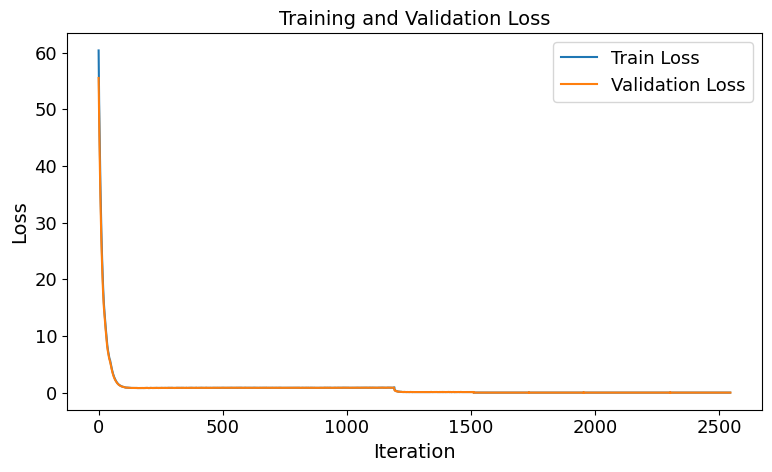

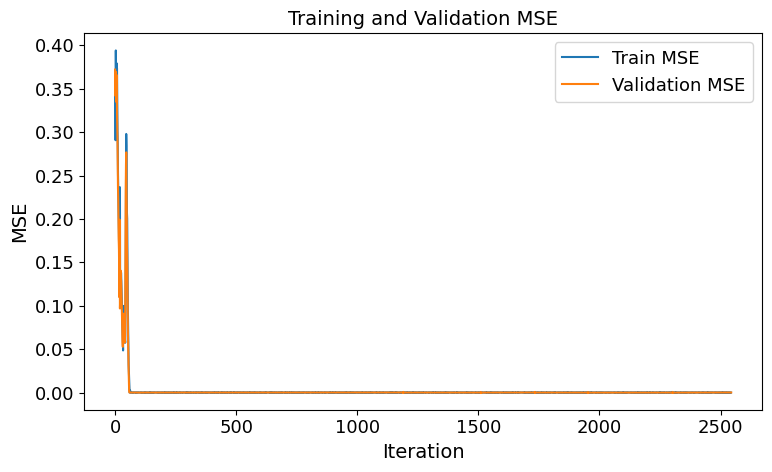

In [28]:
os.chdir(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez')
loss_rel_path=r'Experiments\results\Pytorch_RP_fig2_rep_c65774d6a4fef0b13bf1c2f9cc8d7d2a\seed_000\record_eval.csv'
plot_loss_curves(loss_rel_path)

Pearson correlation coefficient: 0.1067, p-value: 0.0001777


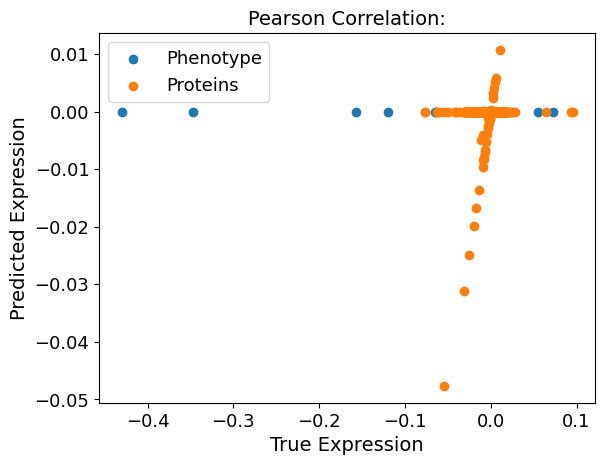

In [48]:
from scipy.stats import pearsonr

def plot_pearson_correlation(y_path, yhat_path, row_matching_path,col_numbers_pheno=-5):
    y_path=r'Experiments\cellbox_files\tgtd_prots&trials_only\run1directly_targeted_proteinsexpr.csv'
    yhat_path=r'Experiments\results\RP_tgtd_prots________d3a19944f3462fcaff2ad3adea346ede\seed_000\6_best.y_hat.loss.0.00021348285634303465.csv'
    row_matching_path=r'Experiments\results\RP_tgtd_prots________d3a19944f3462fcaff2ad3adea346ede\seed_000\random_pos.csv'

    y = pd.read_csv(y_path, header=None)
    yhat = pd.read_csv(yhat_path).iloc[:,1:]
    row_matching = pd.read_csv(row_matching_path, header=None)

    # Get test indices (assuming test set is at the end)
    test_indices = row_matching[-(yhat.shape[0]):]

    test_indices_list = test_indices[0].values
    if col_numbers_pheno==-5:
        col_numbers_pheno=yhat.columns.get_loc('Cell_viability%_(cck8Drug-blk)/(control-blk)*100')
    # Get all columns except the phenotype column
    all_columns = list(range(yhat.shape[1]))
    prot_columns = [col for col in all_columns if col != col_numbers_pheno]


    y_true_pheno=y.iloc[test_indices_list,col_numbers_pheno].to_numpy().flatten().astype(float)
    y_true_prots=y.iloc[test_indices_list,prot_columns].to_numpy().flatten().astype(float)
    yhat_pheno=yhat.iloc[:,col_numbers_pheno].to_numpy().flatten().astype(float)
    yhat_prots=yhat.iloc[:,prot_columns].to_numpy().flatten().astype(float)


    # Calculate Pearson correlation coefficient
    pearson_corr, pearson_pval = pearsonr(np.concatenate((y_true_pheno,y_true_prots)), np.concatenate((yhat_pheno,yhat_prots)))
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_pval:.4g}")

    plt.scatter(y_true_pheno, yhat_pheno,label='Phenotype')
    plt.scatter(y_true_prots,yhat_prots,label='Proteins')
    plt.legend()
    plt.xlabel('True Expression')
    plt.ylabel('Predicted Expression')
    plt.title('Pearson Correlation:')
    plt.show()



y_path=r'Experiments\cellbox_files\tgtd_prots&trials_only\run1directly_targeted_proteinsexpr.csv'
yhat_path=r'Experiments\results\RP_tgtd_prots________d3a19944f3462fcaff2ad3adea346ede\seed_000\6_best.y_hat.loss.0.00021348285634303465.csv'
row_matching_path=r'Experiments\results\RP_tgtd_prots________d3a19944f3462fcaff2ad3adea346ede\seed_000\random_pos.csv'
plot_pearson_correlation(y_path, yhat_path, row_matching_path)
